In [1]:
import pandas as pd

import tqdm

In [2]:
import glob 

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import matplotlib.colors as colors

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import numpy as np

In [19]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 12,
        }

In [8]:
matplotlib.rc('font', **font)

## Analysis for low and high benefit

In [9]:
reds, blues = matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Blues")
cmaps = [blues, reds]

In [10]:
expected_dfs = [pd.read_csv(f"../matlab/data/expected/clean_c_1_b_{b_val}_stochastic_0.csv") 
                for b_val in [3, 10]]

In [11]:
last_round_dfs = [pd.read_csv(f"../matlab/data/stochastic/clean_c_1_b_{b_val}_stochastic_1.csv") 
                  for b_val in [3, 10]]

In [12]:
heatmaps = []
extents = []

for exp, stoch in zip(expected_dfs, last_round_dfs):
    
    for df in [exp, stoch]:
        
        ps, qs = [], []
        for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
            for _ in range(int(v)):
                ps.append(p)
                qs.append(q)


        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        heatmaps.append(heatmap)
        extents.append(extent)

In [13]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [14]:
min_, max_

(1.0, 1391629.0)

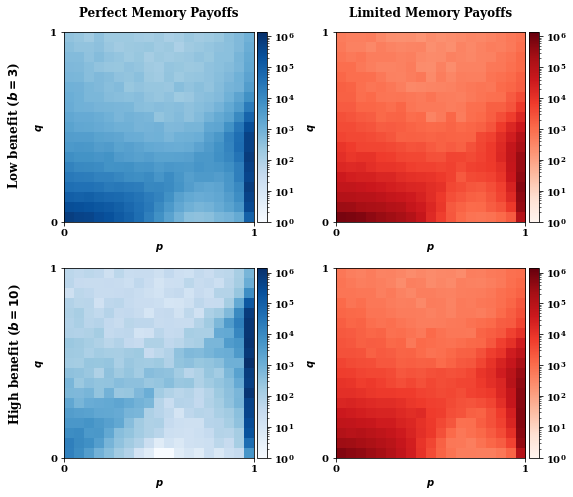

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 7))

for i, heatmap in enumerate(heatmaps):
    
    index = (int(i / 2), (i % 2))

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[(i % 2)],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")


axes[(0, 0)].set_title(r"Perfect Memory Payoffs", weight="bold", y=1.05);
axes[(0, 1)].set_title(r"Limited Memory Payoffs", weight="bold", y=1.05);

axes[(0, 0)].set_ylabel("$q$")

axes[(0, 0)].text(-0.3,
              0.2,
              "Low benefit ($b=3$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

axes[(1, 0)].text(-0.3,
              0.2,
              "High benefit ($b=10$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

fig.tight_layout();

# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

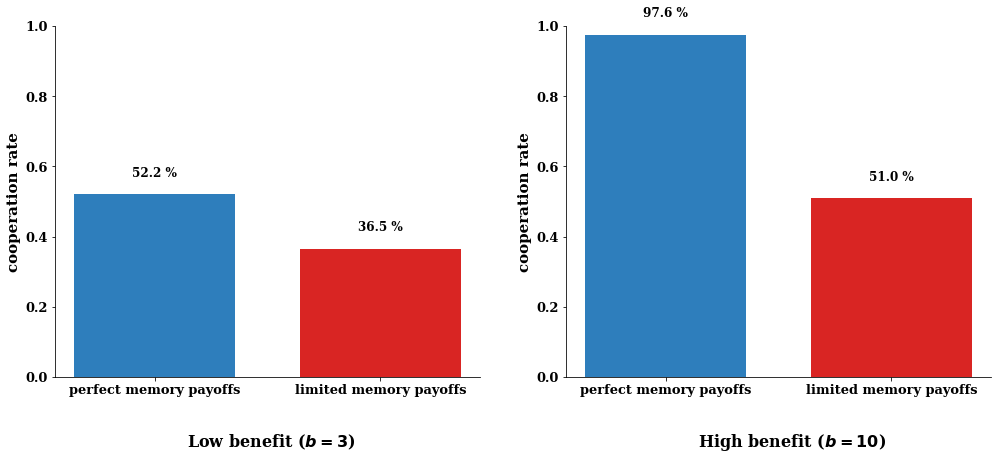

In [41]:
bars = ('perfect memory payoffs', 'limited memory payoffs')


fig, axes = plt.subplots(ncols=2, figsize=(14, 6.5));

for i in range(2):
    
    exp = expected_dfs[i]
    stoch = last_round_dfs[i]
    
    height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
          for df in [exp, stoch]]

    x_pos = np.arange(len(bars))
    
    axes[i].bar([0, 0.07], height, width=0.05,  color=[blues(0.7), reds(0.7)])

    axes[i].set_ylabel("cooperation rate", weight="bold", fontsize=15);

    axes[i].set_ylim(0, 1);
#     axes[i].set_yticklabels([bars[0], bars[1]], fontsize=13);
    axes[i].set_xticks([0, 0.07,]);
    axes[i].set_xticklabels([bars[0], bars[1]], fontsize=13);

#     plt.xticks([0, 0.1], bars);

    for ax in [axes[i].spines["right"], axes[i].spines["top"]]:
        ax.set_visible(False);

    for j, pos in enumerate([0, 0.07]):
        axes[i].text(pos,
              height[j] + 0.05,
              f"{round(height[j], 3) * 100} %",
              horizontalalignment='center',
              color="black",
              weight='bold',
              fontsize=12
          )
        
    axes[i].tick_params(axis='both', which='major', labelsize=13)

for ax, label in zip(axes, ["Low benefit ($b=3$)", "High benefit ($b=10$)"]):    
    ax.text(0.01,  -.2, label, fontsize=16)

plt.tight_layout();
plt.subplots_adjust(wspace=.2)

plt.savefig("../static/cooperation_rates_expected_and_stochastic_for_donation_game.pdf")

## Analysis over parameters $b$ and $\beta$

### Benefit analysis

In [147]:
import re

start = 'b_'

In [148]:
csv_files = [f'../matlab/data/expected/clean_c_1_b_{b}_stochastic_0.csv' for b in range(2, 11)]
csv_files_lr = [f'../data/clean_last_round_b_{b}.csv' for b in range(2, 11)]

In [149]:
end = '_stochastic'

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [45]:
points_p = []
points_q = []

for df in dfs:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [63]:
heatmaps = []
extents = []
for p, q in zip(points_p, points_q):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [64]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

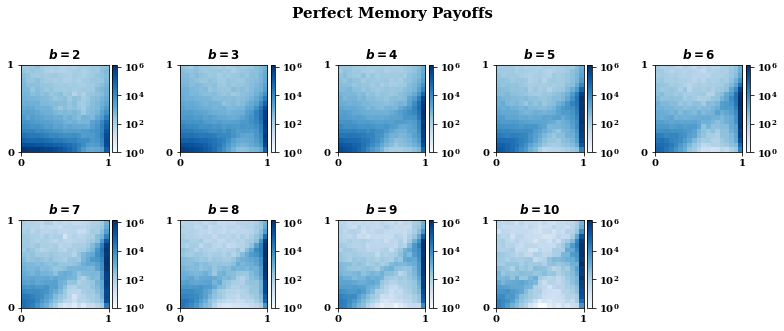

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 5))

for i, heatmap in enumerate(heatmaps):
    
    index = (int(i / 5), i % 5)

    im = axes[index].imshow(heatmap.T, extent=extents[i], origin="lower",
                            cmap=matplotlib.cm.get_cmap("Blues"),
                            norm=colors.LogNorm(vmin=min_,
                                                vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_title(f"$b={dfs[i]['b'].unique()[0]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

fig.suptitle('Perfect Memory Payoffs', weight="bold", fontsize=15)
plt.tight_layout();

fig.delaxes(axes[(1, 4)]);

plt.savefig("../static/expected_for_beta.pdf", bbox_inches='tight')

In [150]:
csv_files_lr = [f'../data/last-round/clean_last_round_b_{b}.csv' for b in range(2, 11)]

In [151]:
end = '.csv'
dfs_stoch = []

for file in csv_files_lr:
    df = pd.read_csv(file,)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [48]:
points_p_st = []
points_q_st = []

for df in dfs_stoch:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p_st.append(ps)
    points_q_st.append(qs)

In [104]:
heatmaps = []
extents = []
for p, q in zip(points_p_st, points_q_st):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [105]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

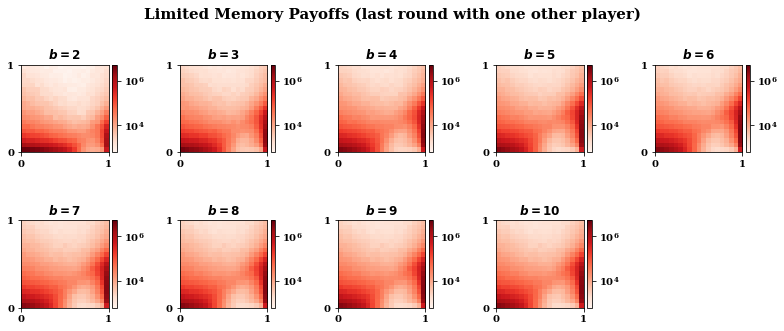

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 5))

for i, heatmap in enumerate(heatmaps):
    index = (int(i / 5), i % 5)

    im = axes[index].imshow(heatmap.T, 
                            extent=extents[i],
                            origin="lower", 
                            cmap=matplotlib.cm.get_cmap("Reds"),
                            norm=colors.LogNorm(vmin=min_,
                                                 vmax=max_))
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[index].set_title(f"$b={dfs_stoch[i]['b'].unique()[0]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

fig.suptitle('Limited Memory Payoffs (last round with one other player)', weight="bold", fontsize=15)

plt.tight_layout();

fig.delaxes(axes[(1, 4)]);

plt.savefig("../static/stochastic_for_beta.pdf", bbox_inches='tight')

In [152]:
cooperation_rates = []
cooperation_rates_expected = []

for exp, stoch in zip(dfs, dfs_stoch):
    
    cooperation_rates_expected.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [153]:
%%capture

generosity = []
generosity_stoch = []

for exp, stoch in zip(dfs, dfs_stoch):


    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
    _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_stoch.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))
    

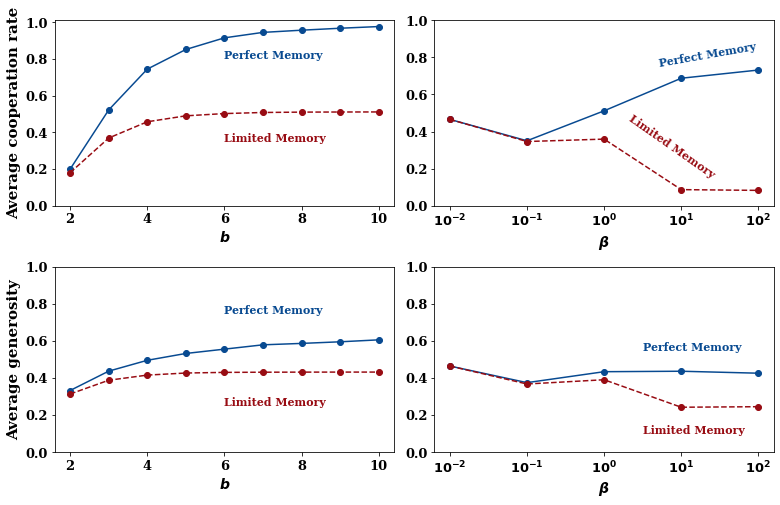

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))


axes[0, 0].plot(range(2, 11), cooperation_rates_expected, "-o", color=blues(0.9), label="expected");
axes[0, 0].plot(range(2, 11), cooperation_rates, "--o", color=reds(.9), label="stochastic");

axes[0, 0].set_ylabel('Average cooperation rate', weight="bold", fontsize=15);
axes[0, 0].set_ylim(0, 1.01);
axes[0, 0].set_xlabel("$b$", weight="bold", fontsize=14);
axes[0, 0].text(6, .8, "Perfect Memory", fontsize=11, color=blues(.9))
axes[0, 0].text(6, .35, "Limited Memory", fontsize=11, color=reds(.9));


axes[(0,0)].tick_params(axis='both', which='major', labelsize=13)


axes[1, 0].plot(range(2, 11), generosity, "-o", color=blues(0.9), label="expected");
axes[1, 0].plot(range(2, 11), generosity_stoch, "--o", color=reds(.9), label="stochastic");
axes[1, 0].set_xlabel("$b$", weight="bold", fontsize=14);
axes[1, 0].set_ylabel('Average generosity', weight="bold", fontsize=15);
axes[1, 0].set_ylim(0, 1);

axes[1, 0].text(6, .75, "Perfect Memory", fontsize=11, color=blues(.9))
axes[1, 0].text(6, .25, "Limited Memory", fontsize=11, color=reds(.9))

axes[(1,0)].tick_params(axis='both', which='major', labelsize=13)


axes[0, 1].plot(range(1, 6), cooperation_rates_beta_expected, "-o", color=blues(0.9));
axes[0, 1].plot(range(1, 6), cooperation_rates_beta, "--o", color=reds(0.9));
axes[0, 1].set_xlabel(r'$\beta$', weight="bold", fontsize=14);

axes[0, 1].set_xticks([1, 2, 3, 4, 5]);
axes[0, 1].set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes[0, 1].set_ylim(0, 1);
axes[0, 1].text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9), rotation=10)
axes[0, 1].text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), rotation=-35)

axes[(0, 1)].tick_params(axis='both', which='major', labelsize=13)
axes[(1, 1)].tick_params(axis='both', which='major', labelsize=13)

axes[(1, 1)].plot(range(1, 6), generosity_beta, "-o", color=blues(0.9), label="expected");
axes[(1, 1)].plot(range(1, 6), generosity_stoch_beta, "--o", color=reds(.9), label="stochastic");
axes[(1, 1)].set_xlabel(r'$\beta$', weight="bold", fontsize=14);
axes[(1, 1)].set_ylim(0, 1);

axes[(1, 1)].text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes[(1, 1)].text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9))

axes[(1, 1)].set_xticks([1, 2, 3, 4, 5]);
axes[(1, 1)].set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);
plt.tight_layout();

plt.savefig("../static/cooperation_rate_over_b.pdf", bbox_inches='tight')

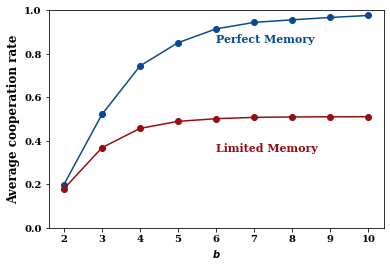

In [110]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), cooperation_rates_expected, "-o", color=blues(0.9), label="expected");
axes.plot(range(2, 11), cooperation_rates, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1);

axes.text(6, .85, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(6, .35, "Limited Memory", fontsize=11, color=reds(.9))

plt.savefig("../static/cooperation_rate_over_b.pdf", bbox_inches='tight')

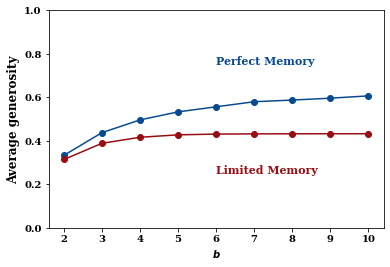

In [111]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), generosity, "-o", color=blues(0.9), label="expected");
axes.plot(range(2, 11), generosity_stoch, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1);

axes.text(6, .75, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(6, .25, "Limited Memory", fontsize=11, color=reds(.9))

plt.savefig("../static/generosity_over_b.pdf", bbox_inches='tight')

### Strength of selection analysis 

In [155]:
betas = [0.01, 0.1, 1, 10, 100]
start = 'beta_'

In [156]:
csv_files = [f'../matlab/data/expected/clean_beta_{beta}_stochastic_0.csv' for beta in betas]
csv_files_lr = [f'../matlab/data/stochastic/clean_beta_{b}_stochastic_1.csv' for b in betas]

In [157]:
end = "_stochastic"

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [115]:
points_p = []
points_q = []

for df in dfs:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [116]:
heatmaps = []
extents = []
for p, q in zip(points_p, points_q):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [117]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

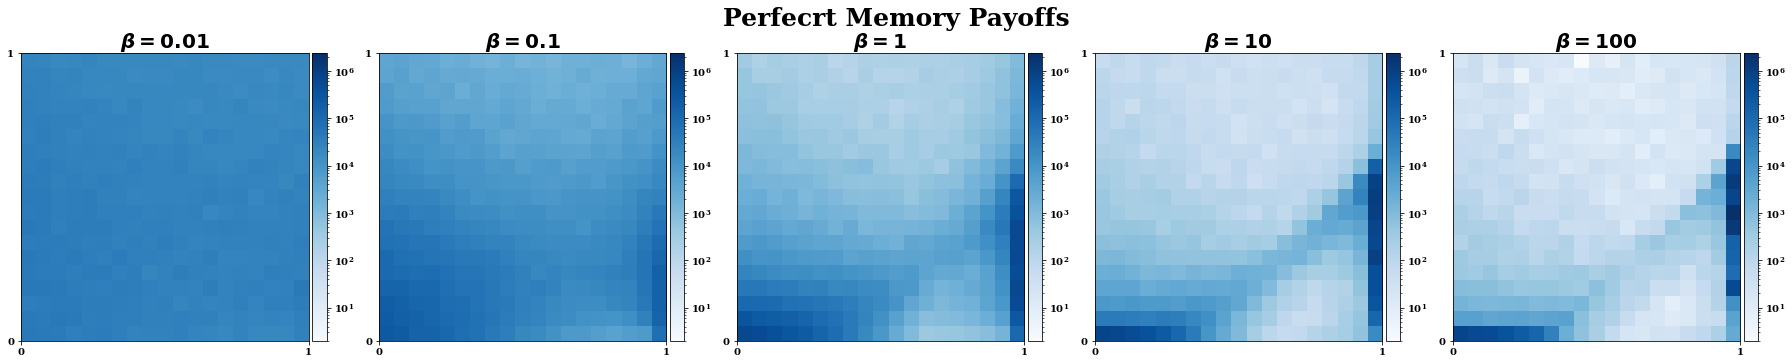

In [118]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, heatmap in enumerate(heatmaps):


    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower",
                        cmap=matplotlib.cm.get_cmap("Blues"),  norm=colors.LogNorm(vmin=min_,
                                                                                    vmax=max_))
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].set_title(fr"$\beta={dfs[i]['b'].unique()[0]}$", weight="bold", fontsize=20);
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2))
    
fig.suptitle('Perfecrt Memory Payoffs', weight="bold", fontsize=25)
plt.tight_layout()

plt.savefig("../static/expected_for_selection_strenght.pdf", bbox_inches='tight')

In [158]:
dfs_stoch = []

for file in csv_files_lr:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [120]:
points_p = []
points_q = []

for df in dfs_stoch:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [121]:
heatmaps = []
extents = []
for p, q in zip(points_p, points_q):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [122]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

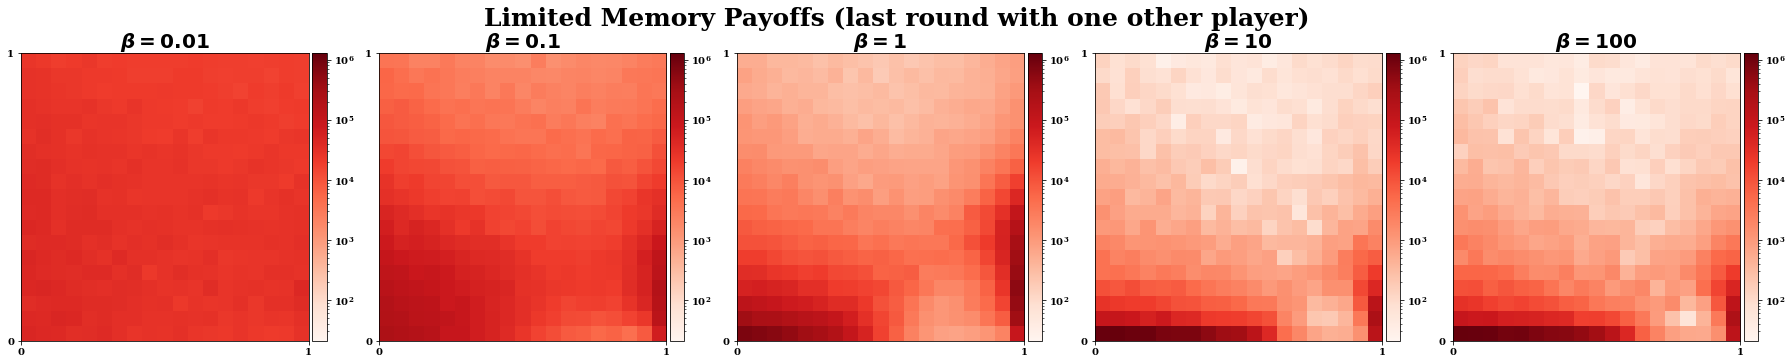

In [123]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower",
                        cmap=matplotlib.cm.get_cmap("Reds"),
                        norm=colors.LogNorm(vmin=min_,
                                            vmax=max_))
    
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].set_title(fr"$\beta={dfs_stoch[i]['b'].unique()[0]}$", weight="bold", fontsize=20);
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2))
    
fig.suptitle('Limited Memory Payoffs (last round with one other player)', weight="bold", fontsize=25)


plt.tight_layout()

plt.savefig("../static/stochastic_for_selection_strenght.pdf", bbox_inches='tight')

In [159]:
cooperation_rates_beta = []
cooperation_rates_beta_expected = []

for exp, stoch in zip(dfs, dfs_stoch):
    
    cooperation_rates_beta_expected.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates_beta.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [160]:
%%capture

generosity_beta = []
generosity_stoch_beta = []

for exp, stoch in zip(dfs, dfs_stoch):


    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity_beta.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
    _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_stoch_beta.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))
    

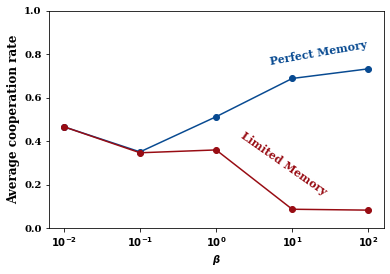

In [126]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), cooperation_rates_expected, "-o", color=blues(0.9));
axes.plot(range(1, 6), cooperation_rates, "-o", color=reds(0.9));

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes.set_ylim(0, 1);
axes.text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9), rotation=10)
axes.text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), rotation=-35)

plt.savefig("../static/cooperation_rate_over_betas.pdf", bbox_inches='tight')

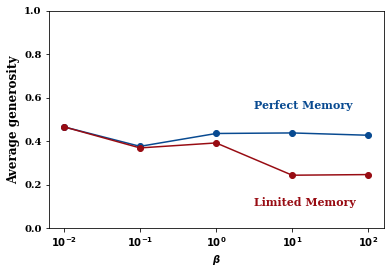

In [127]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), generosity, "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 6), generosity_stoch, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");
axes.set_ylim(0, 1);

axes.text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9))

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

plt.savefig("../static/generosity_over_betas.pdf", bbox_inches='tight')

**Mutation**

In [148]:
files = ["../data/mutation_two/mutation_expected_mutation_0.0001.csv",
"../data/mutation_two/mutation_expected_mutation_0.001.csv",
"../data/mutation_two/mutation_expected_mutation_0.01.csv",
"../data/mutation_two/mutation_expected_mutation_0.1.csv",
"../data/mutation_two/mutation_expected_mutation_1.csv"]

In [149]:
stoch_files = ["../data/mutation_two/mutation_last_round_mutation_0.0001.csv",
"../data/mutation_two/mutation_last_round_mutation_0.001.csv",
"../data/mutation_two/mutation_last_round_mutation_0.01.csv",
"../data/mutation_two/mutation_last_round_mutation_0.1.csv",
"../data/mutation_two/mutation_last_round_mutation_1.csv"]


In [150]:
mutations = [pd.read_csv(file) for file in files]
stoch_mutations = [pd.read_csv(file) for file in stoch_files]

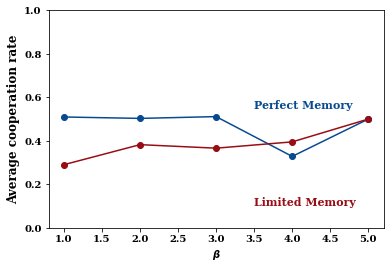

In [152]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), [mutation['coop'].values[0] for mutation in mutations],
          "-o", color=blues(0.9), label="expected");

axes.plot(range(1, 6), [mutation['coop'].values[0] for mutation in stoch_mutations],
          "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");
axes.set_ylim(0, 1);

axes.text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9));

# axes.set_xticks([1, 2, 3, 4, 5]);
# axes.set_xticklabels([r"$10^{-2}$", 
#                       r"$10^{-1}$", 
#                       r"$10^{0}$",
#                       r"$10^{1}$", 
#                       r"$10^{2}$"]);

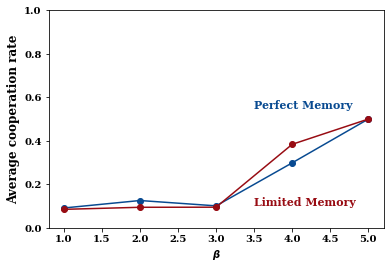

In [153]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), [mutation['q'].values[0] for mutation in mutations],
          "-o", color=blues(0.9), label="expected");

axes.plot(range(1, 6), [mutation['q'].values[0] for mutation in stoch_mutations],
          "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");
axes.set_ylim(0, 1);

axes.text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9));

In [154]:
mutations[0]

,R,S,T,P,N,beta,mutation,numberIterations,coop,y,p,q
0,2,-1,3,0,100,1,0.0001,100000000,0.509605,0.167772,0.167772,0.09117


In [155]:
pd.read_csv("../data/mutation_two/mutation_expected_mutation_0.0001population_.csv", 
            names=[''])

,0.6187508,0.09035762,0.2709694
0,0.618751,0.090358,0.270969
1,0.618751,0.090358,0.270969
2,0.618751,0.090358,0.270969
3,0.618751,0.090358,0.270969
4,0.618751,0.090358,0.270969
...,...,...,...
94,0.618751,0.090358,0.270969
95,0.618751,0.090358,0.270969
96,0.618751,0.090358,0.270969
97,0.618751,0.090358,0.270969
